# ABEL plasma-density ramp example

By Carl A. Lindstrøm (University of Oslo), 20 Oct 2023

### Import ABEL framework

In [1]:
from abel import *
import numpy as np
%load_ext autoreload
%autoreload 2

### Define the linac and beams

In [6]:
# define driver
driver = SourceBasic()
driver.charge = -2.7e10 * SI.e # [C]
driver.energy = 31.25e9 # [eV]
driver.rel_energy_spread = 0.01
driver.bunch_length = 42e-6 # [m]
driver.z_offset = 300e-6 # [m]
driver.emit_nx, driver.emit_ny = 80e-6, 80e-6 # [m rad]
driver.beta_x, driver.beta_y = 0.2, 0.2 # [m]
driver.num_particles = 100000
driver.jitter.x = 0e-9 # [m]
driver.jitter.y = 0e-9 # [m]
driver.symmetrize = True

energy = 50e9 # [eV]

# define stage
#stage = StageQuasistatic2d()
stage = StageHipace()
stage.driver_source = driver
stage.ion_motion = False
stage.nom_energy_gain = 31.9e9/10 # [eV]
stage.nom_accel_gradient = 6.4e9 # [GV/m]
stage.plasma_density = 7e21 # [m^-3]
stage.enable_radiation_reaction = False

# define upramp
#stage.upramp = StageHipace()
stage.upramp = StageQuasistatic2d()
ramp_beta_mag = 10
inner_beta = stage.matched_beta_function(energy)
stage.upramp.length = inner_beta*np.pi/(2*np.sqrt(1/ramp_beta_mag))
stage.upramp.plasma_density = stage.plasma_density/ramp_beta_mag
stage.upramp.ion_motion = False

# define downramp
#stage.downramp = StageHipace()
stage.downramp = StageQuasistatic2d()
inner_beta2 = stage.matched_beta_function(energy+stage.nom_energy_gain)
stage.downramp.length = inner_beta2*np.pi/(2*np.sqrt(1/ramp_beta_mag))
stage.downramp.plasma_density = stage.plasma_density/ramp_beta_mag
stage.downramp.ion_motion = False

# define beam
source = SourceBasic()
source.charge = -1e10 * SI.e # [C]
source.energy = energy
source.rel_energy_spread = 0.01
source.bunch_length = 18e-6 # [m]
source.z_offset = -36e-6 # [m]
#source.emit_nx, source.emit_ny = 90e-6, 0.32e-6 # [m rad]
source.emit_nx, source.emit_ny = 1e-6, 1e-6 # [m rad]
source.beta_x = ramp_beta_mag*stage.matched_beta_function(energy)
source.beta_y = source.beta_x
source.x_offset = 0.1e-6
source.y_angle = 0.001e-3
source.num_particles = 10000

# define linac@
linac = PlasmaLinac()
linac.source = source
linac.stage = stage
linac.num_stages = 1

### Run simulations

In [7]:
linac.stage.num_nodes = 8
linac.run('ramp_example', num_shots=1, overwrite=True, parallel=False);

Tracked #0  SourceBasic             (s =    0.0 m) :   E =  50.0 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε =   1.0/1.0 mm-mrad
>> Finished HiPACE++ (job 8233390): 100%|██████████████████████████████████████| 57/57 [01:36<00:00,  1.70s/ steps]
    ... #2  StageQuasistatic2d #2   (s =    0.6 m) :   E =  53.1 GeV, Q = -1.60 nC, σz =  18.1 µm, σE =  1.0%, ε =   1.0/1.0 mm-mrad


### Plot the wakefield

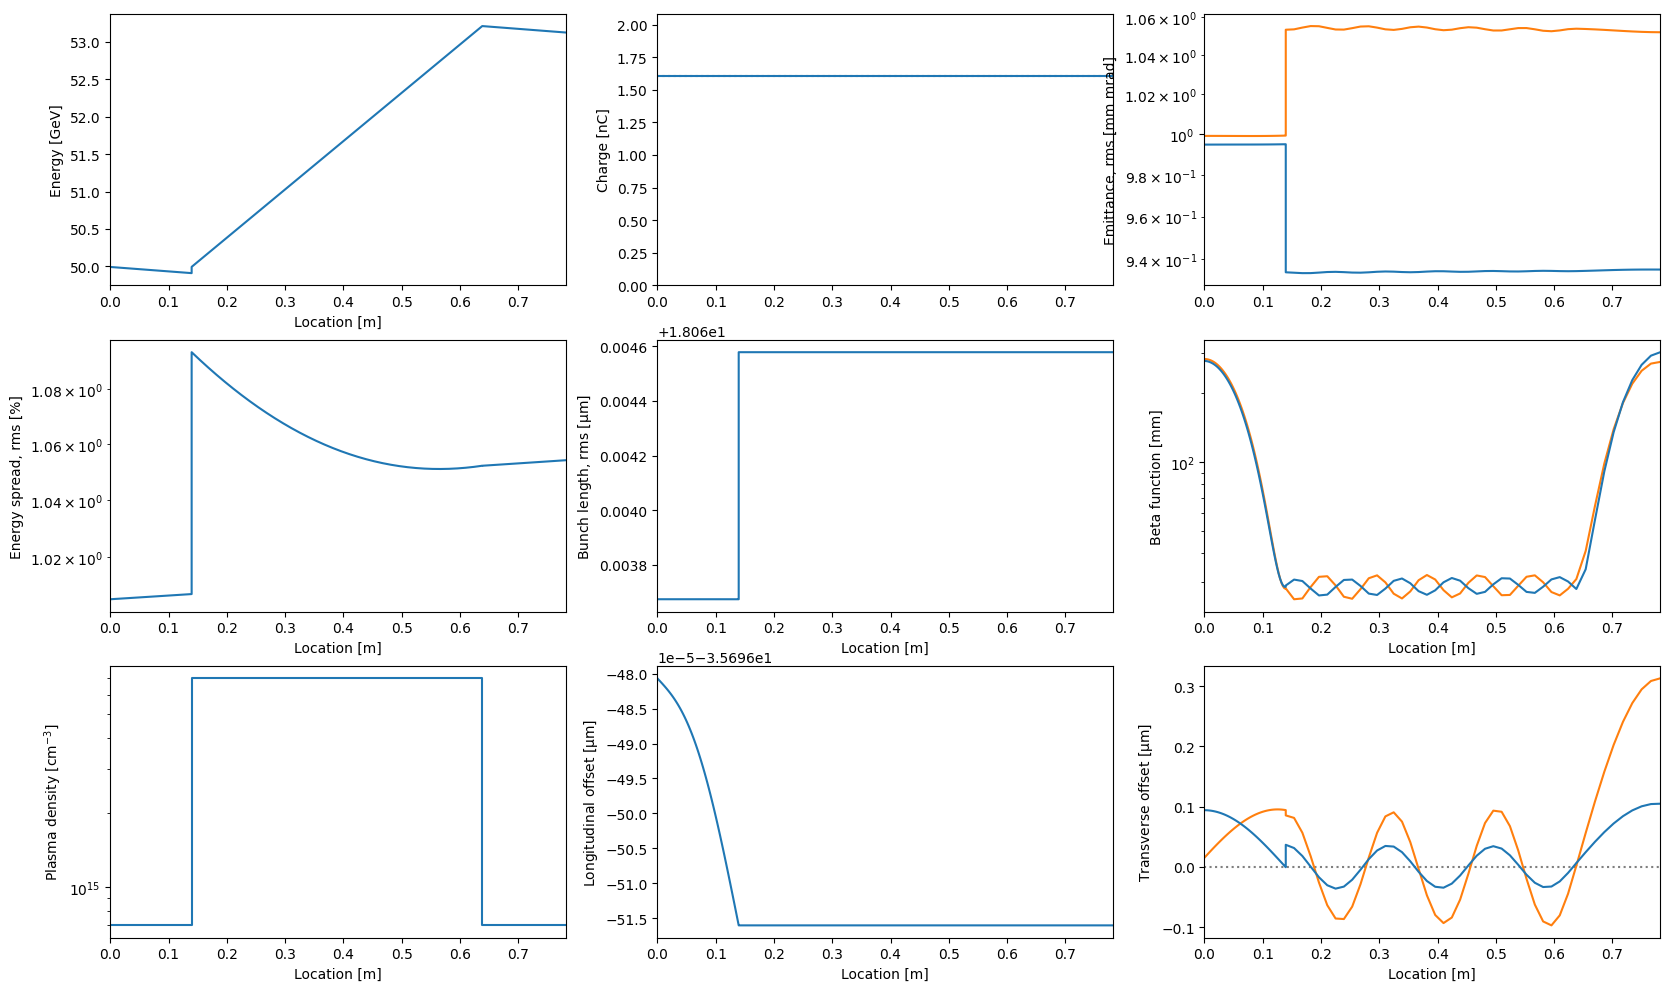

In [8]:
# plot the first-stage wakefield
linac.stage.plot_evolution()

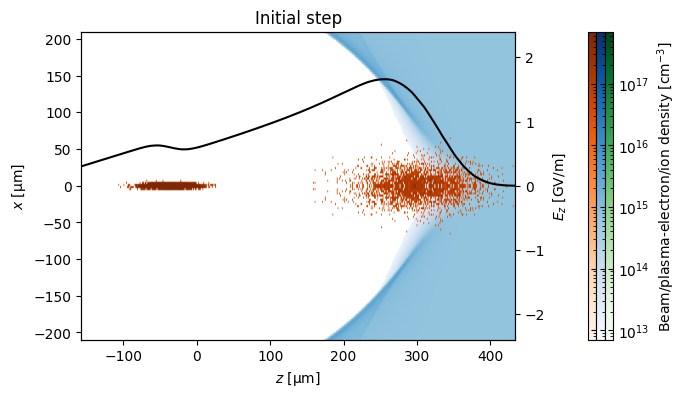

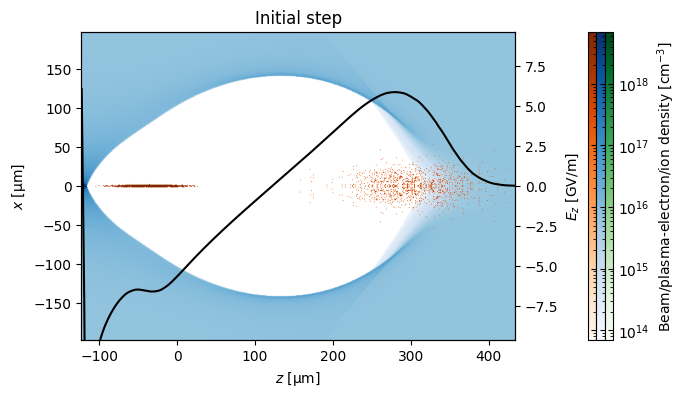

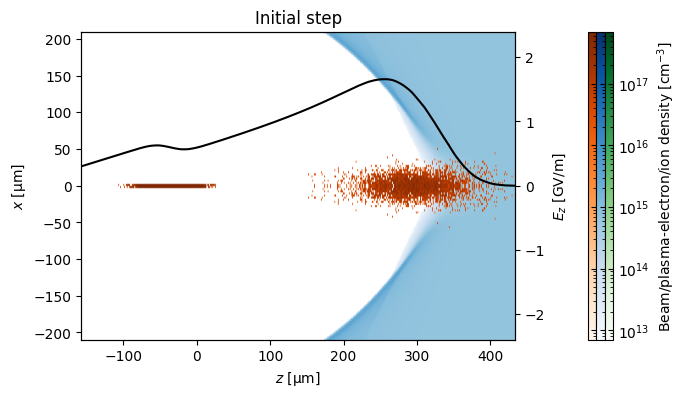

In [5]:
# plot the first-stage wakefield
linac.stage.upramp.plot_wake()
linac.stage.plot_wake()
linac.stage.downramp.plot_wake()